### Настройки

Начинаем с импорта библиотек

In [3]:
# Импортируем библиотеки: pandas для работы с таблицами, psycopg2 для подключения к PostgreSQL
import pandas as pd
import psycopg2  # библиотека для работы с PostgreSQL

# Используем словарь df для хранения нескольких DataFrame по ключам (удобно для отображения).
df = {}

Начинаем с импорта библиотек

In [4]:
# Параметры подключения к БД (пример из курса).
DBNAME = 'skillfactory'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'  # Замените на ваш пароль или используйте secrets
HOST = '84.201.134.129'
PORT = 5432

In [5]:
# Создаём соединение с PostgreSQL с параметрами выше.
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT,
)

In [6]:
# Пример формирования SQL-запроса в строковой переменной.
# Здесь показывается использование f-строки для подставления параметров (n).

n = 10
query = f'''SELECT * 
            FROM sql.pokemon 
            LIMIT {n}
         '''
# В реальных задачах лучше использовать параметры запросов, чтобы избегать SQL-инъекций.

In [7]:
# Выполняем SQL-запрос и загружаем результат в DataFrame pandas.
# read_sql_query возвращает DataFrame, удобный для дальнейшего анализа и отображения.

df_ = pd.read_sql_query(query, connection)
df_

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\3462785109.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ = pd.read_sql_query(query, connection)


,id,name,type1,type2,hp,attack,defense,speed
0,1,Bulbasaur,Grass,Poison,45,49,49,45
1,2,Ivysaur,Grass,Poison,60,62,63,60
2,3,Venusaur,Grass,Poison,80,82,83,80
3,4,VenusaurMega Venusaur,Grass,Poison,80,100,123,80
4,7,Charizard,Fire,Flying,78,84,78,100
5,8,CharizardMega Charizard X,Fire,Dragon,78,130,111,100
6,9,CharizardMega Charizard Y,Fire,Flying,78,104,78,100
7,16,Butterfree,Bug,Flying,60,45,50,70
8,17,Weedle,Bug,Poison,40,35,30,50
9,18,Kakuna,Bug,Poison,45,25,50,35


In [8]:
# Пример подключения к другой базе 'project_sql' (переназначение параметров).
# Для смены БД достаточно изменить переменные выше и создать новое соединение.
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'  # замените при необходимости
HOST = '84.201.134.129'
PORT = 5432

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT,
)

### ERD-схема: Структура базы данных вакансий

!['project_sql ERD'](plots/Project_2_Public_HH_ERD.png)

Диаграмма отображает структуру и связи между ключевыми сущностями в базе данных, связанной с вакансиями, работодателями, отраслями и регионами.

#### Основные таблицы:

- **industries** — содержит список отраслей, каждая с уникальным `id`.
- **employers** — таблица работодателей, включает `name` и `area`.
- **areas** — справочник географических регионов (`name`).
- **vacancies** — основная таблица вакансий, включает:
  - Название вакансии (`name`)
  - Ключевые навыки (`key_skills`)
  - График работы, опыт, тип занятости
  - Зарплатные границы (`salary_from`, `salary_to`)
  - Связь с работодателем (`employer_id`) и регионом (`area_id`)
- **employers_industries** — связывает работодателей с отраслями через `employer_id` и `industry_id`.

#### Связи между таблицами:

- `vacancies` связана с `employers` по `employer_id`.
- `vacancies` связана с `areas` по `area_id`.
- `employers_industries` связывает `employers` и `industries`, позволяя одному работодателю работать в нескольких отраслях.

#### Назначение схемы:

- Обеспечивает гибкость при анализе вакансий по отраслям и регионам.
- Позволяет строить запросы для анализа конкуренции, зарплат и распределения работодателей.
- Упрощает визуализацию связей и построение аналитических моделей.



In [9]:
# Задание 3.1 — загрузка таблицы vacancies полностью.
# Внимание: выборка всех строк может быть большой — в учебных целях допустимо.

n = 10  # не используется в этом запросе, оставлено из шаблона
query3_1 = f'''SELECT *
           FROM public.vacancies
        '''

df['vacancies'] = pd.read_sql_query(query3_1, connection)  # загружаем таблицу в df['vacancies']
display(df['vacancies'])  # показываем таблицу
display(df['vacancies'].shape[0])  # показываем количество строк (вакансий)

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\1307468050.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies'] = pd.read_sql_query(query3_1, connection)  # загружаем таблицу в df['vacancies']


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,1955,1740
...,...,...,...,...,...,...,...,...,...,...
49192,55589514,Специалист по информационным технологиям,Электронный документооборот\t1С: Предприятие 8...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,66,5109332
49193,55029668,Руководитель процессного офиса,Оптимизация бизнес-процессов\tСтратегическое м...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,26,51333
49194,66172263,Начальник сервисной службы,Организаторские навыки\tУправление персоналом\...,Полный день,От 1 года до 3 лет,Полная занятость,60000.0,NaN,1930,4094700
49195,66180086,Senior IOS разработчик,Swift\tRealm\tiOS\tАнглийский язык\tMVP\tMVVM\...,Полный день,От 1 года до 3 лет,Полная занятость,146456.0,244094.0,160,4469939


49197

In [10]:
# Альтернативный способ — напрямую посчитать количество записей через COUNT(*) в SQL.

vacancies = pd.read_sql_query("SELECT COUNT(*) FROM public.vacancies", connection)
vacancies_count2 = vacancies.iloc[0, 0]  # извлекаем значение из результата
print('Vacancies:', vacancies_count2)  # выводим количество вакансий

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\517133547.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies = pd.read_sql_query("SELECT COUNT(*) FROM public.vacancies", connection)


Vacancies: 49197


In [11]:
# Задание 3.2 — загрузка таблицы employers и подсчёт числа работодателей.

query3_2 = f'''SELECT *
           FROM public.employers
        '''
df['employers'] = pd.read_sql_query(query3_2, connection)  # сохраняем в df['employers']
display(df['employers'])
print('Number of employers: ', df['employers'].shape[0])  # выводим количество работодателей

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\2343314660.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['employers'] = pd.read_sql_query(query3_2, connection)  # сохраняем в df['employers']


,id,name,area
0,2393,"Программный Продукт, ИТ-компания",1
1,72977,БАРС Груп,88
2,3155,"Бест, Торгово-производственная компания, Екате...",3
3,675,КОРУС Консалтинг,2
4,1840010,филиал ФКУ Налог-Сервис ФНС России в Республик...,88
...,...,...,...
23496,1441774,МарКо,88
23497,4718575,MKomov Studio,73
23498,3702770,АКИБ Ипотека-банк,2759
23499,5636092,ГИМ-КЛИНИКА,99


Number of employers:  23501


In [12]:
# Задание 3.3 — загрузка таблицы areas и подсчёт числа регионов.

query3_3 = f'''select *
           from public.areas
        '''
df['areas'] = pd.read_sql_query(query3_3, connection)  # сохраняем в df['areas']
display(df['areas'])
print('Number of areas: ', df['areas'].shape[0])  # выводим количество регионов

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\3950975185.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['areas'] = pd.read_sql_query(query3_3, connection)  # сохраняем в df['areas']


,id,name
0,2758,Тбилиси
1,8,Майкоп
2,1180,Нерюнгри
3,1240,Новокузнецк
4,2,Санкт-Петербург
...,...,...
1357,5043,Звёздный Городок
1358,3934,Воротынск\n
1359,4825,Чемал
1360,3708,Усть-Нера


Number of areas:  1362


In [13]:
# Задание 3.4 — загрузка таблицы industries и подсчёт числа сфер деятельности.

query3_4 = f'''SELECT *
           FROM public.industries
        '''
df['industries'] = pd.read_sql_query(query3_4, connection)
display(df['industries'])
print('Number of industries: ', df['industries'].shape[0])  # выводим количество сфер

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\1461491943.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['industries'] = pd.read_sql_query(query3_4, connection)


,id,name
0,7.540,Разработка программного обеспечения
1,7.539,"Системная интеграция, автоматизации технологи..."
2,27.550,Безалкогольные напитки (производство)
3,27.551,"Безалкогольные напитки (продвижение, оптовая т..."
4,13.664,Управление и эксплуатация недвижимости
...,...,...
289,37.626,"Ассоциация в сфере культуры, искусства"
290,42.603,Табак (производство)
291,29.532,"Рыболовство, рыбоводство"
292,37.627,Благотворительная организация


Number of industries:  294


In [14]:
# Задание 4.1 — топ-5 регионов по числу вакансий.

query4_1 = f'''select
              a.name area,
              count(v.id) cnt
           from public.areas a
           join public.vacancies v on a.id = v.area_id
           group by a.id
           order by cnt desc
           limit 5
        '''
df['vacancies_num_in_area'] = pd.read_sql_query(query4_1, connection)
display(df['vacancies_num_in_area'])  # показываем результат

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\2431280656.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_num_in_area'] = pd.read_sql_query(query4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


In [15]:
# Задание 4.2 — считаем вакансии, где указана хотя бы одна граница зарплаты.

query4_2 = f'''
    SELECT COUNT(*) AS cnt
    FROM public.vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''
df['vacancies_with_salary'] = pd.read_sql_query(query4_2, connection)
display(df['vacancies_with_salary'])  # показываем количество вакансий с указанной зарплатой

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\3667544442.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_with_salary'] = pd.read_sql_query(query4_2, connection)


,cnt
0,24073


In [16]:
# Задание 4.3 — вычисляем среднее по нижней и верхней границе зарплаты (округлено).

query4_3 = f'''
    SELECT
        ROUND(AVG(salary_from)) AS avg_salary_from,
        ROUND(AVG(salary_to)) AS avg_salary_to
    FROM public.vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''
df['avg_salary_range'] = pd.read_sql_query(query4_3, connection)
display(df['avg_salary_range'])  # показываем средние значения зарплат

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\1468439817.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['avg_salary_range'] = pd.read_sql_query(query4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


In [17]:
# Задание 4.4 — находим вторую по популярности пару (schedule, employment).

query4_4 = f'''
    SELECT
        schedule,
        employment,
        COUNT(*) AS cnt
    FROM public.vacancies
    GROUP BY schedule, employment
    ORDER BY cnt DESC
    OFFSET 1
    LIMIT 1
'''
df['vacancies_by_schedule_employment'] = pd.read_sql_query(query4_4, connection)
display(df['vacancies_by_schedule_employment'])  # выводим пару на 2-м месте

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\2023268951.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_by_schedule_employment'] = pd.read_sql_query(query4_4, connection)


,schedule,employment,cnt
0,Удаленная работа,Полная занятость,7802


In [18]:
# Задание 4.5 — сортируем варианты опыта по возрастанию количества вакансий, где указан этот опыт.

query4_5 = f'''select
              v.experience,
              count(v.id) experience_cnt
           from public.vacancies v
           group by v.experience
           order by experience_cnt asc
        '''
df['experience_cnt'] = pd.read_sql_query(query4_5, connection)
display(df['experience_cnt'])  # показываем результат

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\1590331682.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['experience_cnt'] = pd.read_sql_query(query4_5, connection)


,experience,experience_cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


In [19]:
# Задание 5.1 — находим работодателей на 1-м и 5-м местах по числу вакансий.

query5_1 = f'''WITH emp_count AS (SELECT e.name, COUNT(v.id) cnt
           FROM public.employers e
           JOIN public.vacancies v ON e.id = v.employer_id
           GROUP BY e.id
           ORDER BY cnt DESC
        )
        SELECT *
        FROM emp_count
        WHERE cnt = (SELECT MAX(cnt) FROM emp_count)
        OR cnt = (SELECT cnt FROM emp_count ORDER BY cnt DESC OFFSET 4 LIMIT 1)
        '''
df['top_1_and_5_employers'] = pd.read_sql_query(query5_1, connection)
display(df['top_1_and_5_employers'])  # показываем топ-1 и топ-5 работодателей

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\1211410324.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['top_1_and_5_employers'] = pd.read_sql_query(query5_1, connection)


,name,cnt
0,Яндекс,1933
1,Газпром нефть,331


In [20]:
# Задание 5.2 — ищем регион без вакансий с максимальным числом работодателей.

query5_2 = f'''
    SELECT a.name AS area_name,
           COUNT(e.id) AS employer_count,
           COUNT(v.id) AS vacancy_count
    FROM public.areas a
    LEFT JOIN public.employers e ON a.id = e.area
    LEFT JOIN public.vacancies v ON a.id = v.area_id
    GROUP BY a.name
    HAVING COUNT(v.id) = 0
    ORDER BY employer_count DESC
    LIMIT 1
'''
df['region_with_most_employers_no_vacancies'] = pd.read_sql_query(query5_2, connection)
display(df['region_with_most_employers_no_vacancies'])  # показываем найденный регион

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\379473102.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['region_with_most_employers_no_vacancies'] = pd.read_sql_query(query5_2, connection)


,area_name,employer_count,vacancy_count
0,Россия,410,0


In [21]:
# Задание 5.3 — считаем для каждого работодателя число уникальных регионов публикации вакансий.

query5_3 = f'''
    SELECT e.id AS employer_id,
           e.name AS employer_name,
           COUNT(DISTINCT v.area_id) AS region_count
    FROM public.employers e
    LEFT JOIN public.vacancies v ON e.id = v.employer_id
    GROUP BY e.id, e.name
    ORDER BY region_count DESC
'''
df['employer_region_counts'] = pd.read_sql_query(query5_3, connection)
display(df['employer_region_counts'])  # показываем работодателей и число регионов

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\2853631251.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['employer_region_counts'] = pd.read_sql_query(query5_3, connection)


,employer_id,employer_name,region_count
0,1740,Яндекс,181
1,2748,Ростелеком,152
2,5724811,Спецремонт,116
3,5130287,Поляков Денис Иванович,88
4,3682876,ООО ЕФИН,71
...,...,...,...
23496,5287515,Но Смокинг,0
23497,2839354,МАСТЕРСКАЯ CREED,0
23498,5774578,Dzing Finance,0
23499,5775069,КОРС,0


In [22]:
# Задание 5.4 — считаем работодателей без указания сферы деятельности.

query5_4 = f'''
    SELECT COUNT(*) AS employer_count
    FROM public.employers e
    left join public.employers_industries ei on e.id = ei.employer_id
    WHERE ei.industry_id is null
'''
df['employers_no_industry'] = pd.read_sql_query(query5_4, connection)
display(df['employers_no_industry'])  # показываем число таких работодателей

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\1061763170.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['employers_no_industry'] = pd.read_sql_query(query5_4, connection)


,employer_count
0,8419


In [23]:
# Задание 5.5 — находим третью компанию в алфавите среди компаний с ровно 4 сферами деятельности.

query5_5 = f'''
    SELECT e.name AS employer_name
    FROM public.employers e
    JOIN public.employers_industries ei ON e.id = ei.employer_id
    GROUP BY e.id, e.name
    HAVING COUNT(ei.industry_id) = 4
    ORDER BY e.name
    LIMIT 1 OFFSET 2
'''
df['third_employer_with_four_industries'] = pd.read_sql_query(query5_5, connection)
display(df['third_employer_with_four_industries'])  # выводим название компании

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\1163965445.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['third_employer_with_four_industries'] = pd.read_sql_query(query5_5, connection)


,employer_name
0,2ГИС


In [24]:
# Задание 5.6 — считаем работодателей, у которых в списке сфер есть 'Разработка программного обеспечения'.

query5_6 = f'''
    SELECT COUNT(DISTINCT e.id) AS employer_count
    FROM public.employers e
    JOIN public.employers_industries ei ON e.id = ei.employer_id
    WHERE ei.industry_id = (SELECT id FROM public.industries WHERE name = 'Разработка программного обеспечения')
'''
df['employers_with_software_development'] = pd.read_sql_query(query5_6, connection)
display(df['employers_with_software_development'])  # показываем результат

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\1809080605.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['employers_with_software_development'] = pd.read_sql_query(query5_6, connection)


,employer_count
0,3553


In [25]:
# Задание 5.7 — для 'Яндекс' собираем вакансии по крупным городам (миллионникам) и добавляем строку Total.

query5_7 = f'''
    SELECT a.name AS area_name,
           COUNT(v.id) AS vacancy_count
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    WHERE v.employer_id = (SELECT id FROM public.employers WHERE name = 'Яндекс')
      AND a.name IN ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Самара', 'Омск', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Краснодар','Воронеж', 'Пермь', 'Волгоград')
    GROUP BY a.id, a.name
    UNION ALL
    SELECT 'Total' AS area_name,
           COUNT(v.id) AS vacancy_count
    FROM public.vacancies v
    WHERE v.employer_id = (SELECT id FROM public.employers WHERE name = 'Яндекс')
'''
df['yandex_millionaire_areas'] = pd.read_sql_query(query5_7, connection)
display(df['yandex_millionaire_areas'])  # выводим таблицу по Яндексу

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\2596918924.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['yandex_millionaire_areas'] = pd.read_sql_query(query5_7, connection)


,area_name,vacancy_count
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Новосибирск,35
4,Волгоград,24
5,Воронеж,32
6,Краснодар,30
7,Красноярск,23
8,Нижний Новгород,36
9,Омск,21


In [26]:
# Задание 6.1 — считаем вакансии, в названии которых встречаются 'data' или 'данн' (регистронезависимо).

query6_1 = f'''
    SELECT COUNT(*) AS vacancy_count
    FROM public.vacancies
    WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
'''
df['vacancies_related_to_data'] = pd.read_sql_query(query6_1, connection)
display(df['vacancies_related_to_data'])  # показываем количество вакансий, связанных с данными

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\554087196.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_related_to_data'] = pd.read_sql_query(query6_1, connection)


,vacancy_count
0,1771


In [27]:
# Задание 6.2 — ищем вакансии для начинающих DS по набору ключевых слов в названии и по признакам 'junior'.
# Запрос состоит из двух частей: детализированный список по названиям и итоговый 'total'.

query6_2 = f'''
SELECT
    v.name AS data_science_vacancy,
    COUNT(v.id) AS number_of_vacancies
FROM public.vacancies v
WHERE (
    LOWER(v.name) LIKE '%data scientist%' OR
    LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR
    (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
    LOWER(v.name) LIKE '%machine learning%' OR
    (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
)
AND (
    LOWER(v.name) LIKE '%junior%' OR
    LOWER(v.experience) LIKE '%нет опыта%' OR
    LOWER(v.employment) LIKE '%стажировка%'
)
GROUP BY v.name

UNION ALL

SELECT
    'total' AS data_science_vacancy,
    COUNT(v.id) AS number_of_vacancies
FROM public.vacancies v
WHERE (
    LOWER(v.name) LIKE '%data scientist%' OR
    LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR
    (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
    LOWER(v.name) LIKE '%machine learning%' OR
    (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
)
AND (
    LOWER(v.name) LIKE '%junior%' OR
    LOWER(v.experience) LIKE '%нет опыта%' OR
    LOWER(v.employment) LIKE '%стажировка%'
)

'''
df['junior_vacancies_related_to_data_science'] = pd.read_sql_query(query6_2, connection)
display(df['junior_vacancies_related_to_data_science'])  # показываем найденные вакансии

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\788717767.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['junior_vacancies_related_to_data_science'] = pd.read_sql_query(query6_2, connection)


,data_science_vacancy,number_of_vacancies
0,Data Scientist,1
1,Data Scientist (Computer Vision) - Junior,1
2,Data Scientist (Computer Vision) / Junior,1
3,Data Scientist (Junior),1
4,Data Scientist (Junior+),1
5,"Data Scientist, Junior",2
6,Data Scientist (junior+/middle),1
7,Data scientist (Junior/Middle) в консалтинг,1
8,Data Scientist/Machine Learning Engineer (Deve...,3
9,Data Scientist/ML engineer (Python/C++),1


In [28]:
# Задание 6.2 — вариант с CTE (WITH) для повышения читаемости: сначала фильтруем вакансии, затем считаем.

query6_2_2 = f'''WITH filtered_vacancies AS (
    SELECT v.name, v.id
    FROM public.vacancies v
    WHERE (
        lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (lower(v.name) LIKE '%ml%' AND lower(v.name) NOT LIKE '%html%') OR
        lower(v.name) LIKE '%machine learning%' OR
        lower(v.name) LIKE '%машинн%обучен%'
    )
    AND (
        lower(v.name) LIKE '%junior%' OR
        lower(v.experience) LIKE '%нет опыта%' OR
        lower(v.employment) LIKE '%стажировка%'
    )
)

SELECT
    name AS data_science_vacancy,
    COUNT(id) AS junior_number_of_vacancies
FROM filtered_vacancies
GROUP BY name

UNION ALL

SELECT
    'total' AS data_science_vacancy,
    COUNT(id) AS junior_number_of_vacancies
FROM filtered_vacancies;
'''
df['junior_vacancies_related_to_data_science_2'] = pd.read_sql_query(query6_2_2, connection)
display(df['junior_vacancies_related_to_data_science_2'])  # показываем результат альтернативного запроса

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\534904487.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['junior_vacancies_related_to_data_science_2'] = pd.read_sql_query(query6_2_2, connection)


,data_science_vacancy,junior_number_of_vacancies
0,Junior Research Engineer / Data Scientist,1
1,Data scientist (Junior/Middle) в консалтинг,1
2,Intern/Junior Data Scientist,1
3,Senior Data Scientist (AI),1
4,Риск - Аналитик (Junior Data scientist),1
5,Junior Data Scientist,3
6,"Data Scientist, Junior",2
7,Junior Data Scientist (Promo Forecast),1
8,Junior+ CV/ML developer,1
9,Python developer / Junior ML engineer,1


In [29]:
# Задание 6.3 — среди вакансий для DS смотрим, где в ключевых навыках указаны SQL или Postgres.

query6_3 = f'''WITH filtered_vacancies AS (
    SELECT v.name, v.id, v.key_skills
    FROM public.vacancies v
    WHERE (
        LOWER(v.name) LIKE '%data scientist%' OR
        LOWER(v.name) LIKE '%data science%' OR
        LOWER(v.name) LIKE '%исследователь данных%' OR
        (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
        LOWER(v.name) LIKE '%machine learning%' OR
        (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
    )
)

SELECT
    name AS data_science_vacancy,
    COUNT(id) AS number_of_vacancies_with_sql_or_postgres
FROM filtered_vacancies
WHERE LOWER(key_skills) LIKE '%sql%' OR LOWER(key_skills) LIKE '%postgres%'
GROUP BY name

UNION ALL

SELECT
    'total' AS data_science_vacancy,
    COUNT(id) AS number_of_vacancies_with_sql_or_postgres
FROM filtered_vacancies
WHERE LOWER(key_skills) LIKE '%sql%' OR LOWER(key_skills) LIKE '%postgres%';
'''
df['vacancies_with_sql_or_postgres'] = pd.read_sql_query(query6_3, connection)
display(df['vacancies_with_sql_or_postgres'])  # показываем вакансии, где указаны SQL/Postgres

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\92792377.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_with_sql_or_postgres'] = pd.read_sql_query(query6_3, connection)


,data_science_vacancy,number_of_vacancies_with_sql_or_postgres
0,Data Science эксперт,1
1,Аналитик (data science),1
2,Data scientist (директор) в управление процесс...,1
3,Data Scientist (Middle/Senior),1
4,Разработчик Golang/Python в команду аналитики ...,1
...,...,...
151,C++ разработчик (QML),1
152,Data scientist (Прогнозирование спроса),1
153,TeamLead Analyst BI (AI Driving Data),1
154,TeamLead группы системного администрирования,1


In [30]:
# Задание 6.4 — аналогично проверяем популярность Python в ключевых навыках для DS.

query6_4 = f'''WITH filtered_vacancies AS (
    SELECT v.name, v.id, v.key_skills
    FROM public.vacancies v
    WHERE (
        lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (lower(v.name) LIKE '%ml%' AND lower(v.name) NOT LIKE '%html%') OR
        lower(v.name) LIKE '%machine learning%' OR
        (lower(v.name) LIKE '%машинн%' AND lower(v.name) LIKE '%обучен%')
    )
)

SELECT
    name AS data_science_vacancy,
    COUNT(id) AS number_of_vacancies_with_python
FROM filtered_vacancies
WHERE lower(key_skills) LIKE '%python%'
GROUP BY name

UNION ALL

SELECT
    'total' AS data_science_vacancy,
    COUNT(id) AS number_of_vacancies_with_python
FROM filtered_vacancies
WHERE lower(key_skills) LIKE '%python%';
'''
df['vacancies_with_python'] = pd.read_sql_query(query6_4, connection)
display(df['vacancies_with_python'])  # показываем вакансии с Python в ключевых навыках

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\3730191169.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['vacancies_with_python'] = pd.read_sql_query(query6_4, connection)


,data_science_vacancy,number_of_vacancies_with_python
0,AI/ML Senior Engineer,2
1,Analyst/Data Scientist,1
2,B2B Data Scientist (Эксперт по моделированию и...,1
3,Chief Data Science (Цифровой кредитный монитор...,1
4,Commercial Data Scientist / Эксперт по наукоем...,1
...,...,...
221,Специалист по углубленной аналитике данных (Da...,1
222,Стажёр Data Scientist / Группа сервисов Антифр...,1
223,Старший разработчик (ML engineer),1
224,Эксперт по машинному обучению и искусственному...,2


In [31]:
# Задание 6.5 — считаем количество ключевых навыков (разделитель таб) в каждой вакансии и среднее значение.
# Формула: длина строки minus длина без табов + 1 даёт число элементов, разделённых табом (при наличии хотя бы одного навыка).

query6_5 = f'''WITH filtered_vacancies AS (
    SELECT 
        v.name, 
        v.id, 
        v.key_skills,
        (
            length(lower(v.key_skills)) - length(replace(lower(v.key_skills), CHR(9), '')) + 1
        ) AS key_skills_count
    FROM public.vacancies v
    WHERE (
        LOWER(v.name) LIKE '%data scientist%' OR
        LOWER(v.name) LIKE '%data science%' OR
        LOWER(v.name) LIKE '%исследователь данных%' OR
        (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') OR
        LOWER(v.name) LIKE '%machine learning%' OR
        (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
    )
    AND v.key_skills IS NOT NULL

)

SELECT 
    name AS data_science_vacancy,
    key_skills,
    key_skills_count
FROM filtered_vacancies


UNION ALL

SELECT 
    'average_number_of_key_skills' AS data_science_vacancy,
    NULL AS key_skills,
    ROUND(AVG(fv.key_skills_count), 2) AS key_skills_count
FROM filtered_vacancies fv;
'''
df['avg_key_skills_per_vacancy'] = pd.read_sql_query(query6_5, connection)
display(df['avg_key_skills_per_vacancy'])  # показываем список и среднее количество навыков

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\2189369897.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['avg_key_skills_per_vacancy'] = pd.read_sql_query(query6_5, connection)


,data_science_vacancy,key_skills,key_skills_count
0,Junior+ CV/ML developer,Python\tSQL\tРабота в команде\tOpenCV\tML,5.00
1,Data Scientist,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,9.00
2,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,8.00
3,AI/ML Senior Engineer,Python\tFlask\tLinux\tAWS\tGit,5.00
4,QA Automation TeamLead,Atlassian Jira\tФункциональное тестирование\tS...,11.00
...,...,...,...
477,Middle+/Senior Data Scientist,SCALA\tSQL\tМатематический анализ\tСтатистичес...,7.00
478,ML Engineer Team Lead (to Cyprus),Python\tLinux\tKubernetes\tAWS\tGit\tPeople Ma...,6.00
479,Системный аналитик /Middle+/Senior/TeamLead,UML\tSQL\tBPMN\tSOAP\tREST\tПостановка задач р...,7.00
480,"Frontend разработчик, VueJS (Senior), TeamLead",Git\tJavaScript\tHTML\tCSS\tVue.js\tVue\tREST ...,9.00


In [32]:
# Задание 6.6 — для вакансий DS считаем среднюю запрашиваемую зарплату по типу опыта.
# Если указаны обе границы salary_from и salary_to, берём их среднее, иначе используем существующую границу.

query6_6 = f'''
WITH filtered_vacancies AS (
    SELECT 
        v.experience,
        CASE
            WHEN v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL THEN (v.salary_from + v.salary_to) / 2
            WHEN v.salary_from IS NOT NULL THEN v.salary_from
            WHEN v.salary_to IS NOT NULL THEN v.salary_to
        END AS salary
    FROM public.vacancies v
    WHERE (
        lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (lower(v.name) LIKE '%ml%' AND lower(v.name) NOT LIKE '%html%') OR
        lower(v.name) LIKE '%machine learning%' OR
        (lower(v.name) LIKE '%машинн%' AND lower(v.name) LIKE '%обучен%')
    )
    AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
)

SELECT
    fv.experience,
    ROUND(AVG(fv.salary)) AS avg_salary_requested
FROM filtered_vacancies fv
GROUP BY fv.experience;
'''

df['average_salary_by_experience'] = pd.read_sql_query(query6_6, connection)
display(df['average_salary_by_experience'])  # показываем среднюю зарплату по опыту

C:\Users\ekash\AppData\Local\Temp\ipykernel_46360\4201579560.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df['average_salary_by_experience'] = pd.read_sql_query(query6_6, connection)


,experience,avg_salary_requested
0,От 3 до 6 лет,256454.0
1,От 1 года до 3 лет,144233.0
2,Более 6 лет,157933.0
3,Нет опыта,74643.0


Ниже идут ячейки с кодом и графиками дополнительного исследования и анализа БД

Optional Enhancements
---------------------
Normalize by total vacancies to show percentages
Export to PNG for GitHub README

In [79]:
# Optional Enhancements 1
# Создаем соединение с БД через SQLAlchemy т.к. использование psycopg2.connect()
# провоцирует предупреждение (UserWarning: pandas only supports SQLAlchemy connectable ...)
# Функция для создания соединения с PostgreSQL через SQLAlchemy создается для оперативного подлючения
# из любого места в коде т.к. соединение может быть закрыто после определенного времени простоя. 

from sqlalchemy import create_engine

def create_sqlalchemy_connection(
    dbname='project_sql',
    user='skillfactory',
    password='cCkxxLVrDE8EbvjueeMedPKt',
    host='84.201.134.129',
    port=5432
):
    """
    Creates a SQLAlchemy engine for PostgreSQL connection.

    Returns:
        sqlalchemy.engine.base.Engine: SQLAlchemy engine object.
    """
    connection_string = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}"
    engine = create_engine(connection_string)
    return engine.connect()


In [80]:
# Optional Enhancements 2 
# Подсчет вакансий по сферам деятельности
# Переключаемся на базу 'project_sql' — переопределяем параметры подключения

connection = create_sqlalchemy_connection()

def get_industry_vacancy_distribution(connection):
    """
    Возвращает DataFrame с названиями отраслей и числом вакансий в каждой из них (отсортировано по убыванию).
    Параметры:
        connection (psycopg2 connection): активное подключение к базе данных.
    Возвращает:
        pd.DataFrame: колонки ['industry', 'vacancy_count'] с топ-15 отраслей.
    """
    # SQL-запрос: считаем число вакансий по каждой отрасли, затем берём топ-15
    query = """
        SELECT i.name AS industry, COUNT(v.id) AS vacancy_count
        FROM vacancies v
        JOIN employers_industries ei ON v.employer_id = ei.employer_id
        JOIN industries i ON ei.industry_id = i.id
        GROUP BY i.name
        ORDER BY vacancy_count DESC
        LIMIT 15
    """
    # Выполняем запрос и возвращаем результат в виде DataFrame
    return pd.read_sql_query(query, connection)


# Загружаем результаты в словарь df под ключом 'vacancies_per_industry' и показываем первые строки
df['vacancies_per_industry'] = get_industry_vacancy_distribution(connection)
df['vacancies_per_industry'].head()



,industry,vacancy_count
0,Разработка программного обеспечения,12499
1,"Системная интеграция, автоматизации технологи...",11034
2,"Интернет-компания (поисковики, платежные систе...",6413
3,Банк,2742
4,Мобильная связь,1585


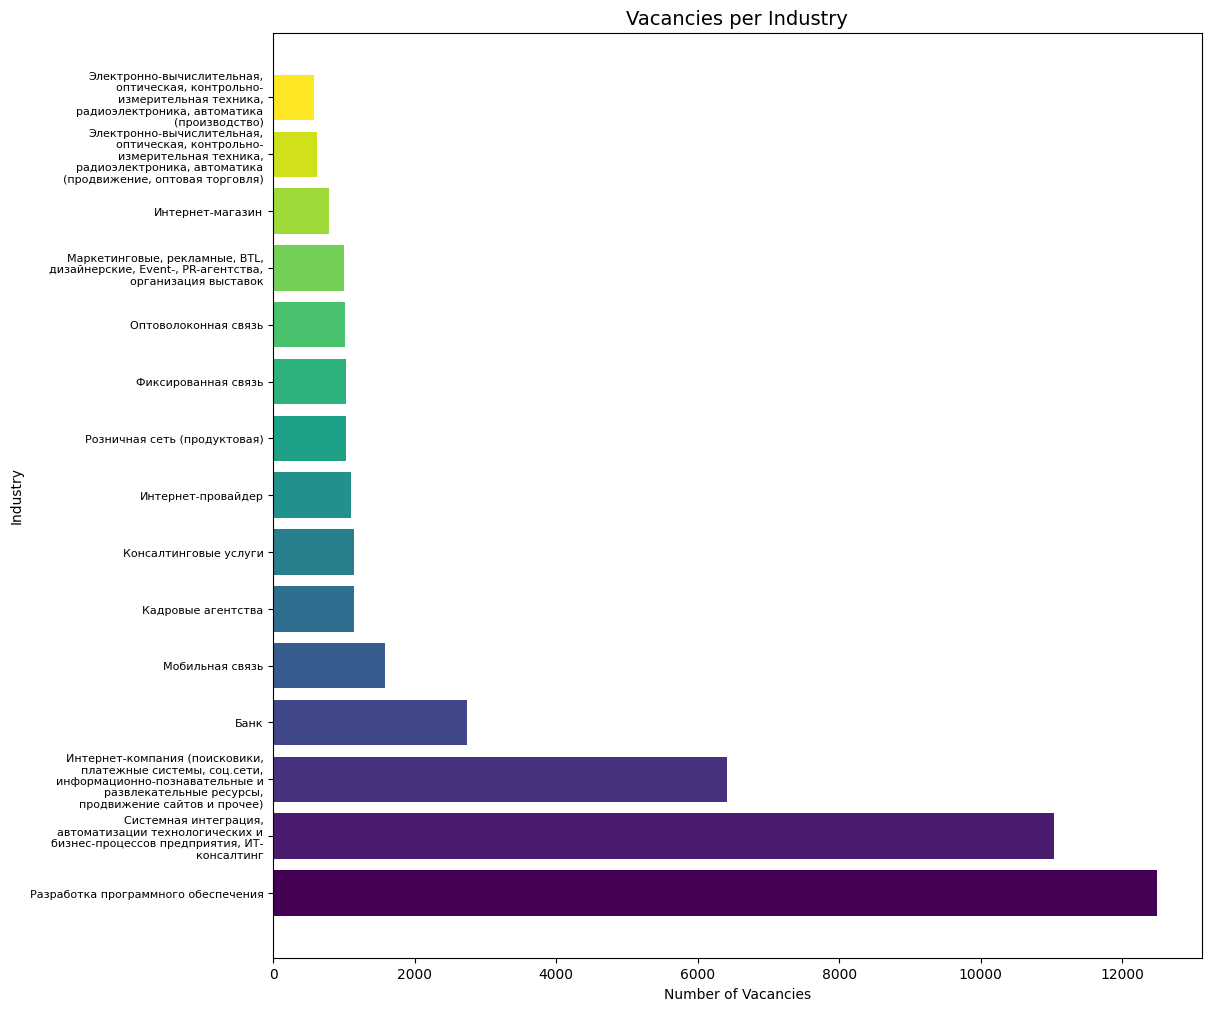

In [81]:
# Optional Enhancements 3
# Горизонтальная столбчатая диаграмма (Seaborn)

import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap


# Подготовка данных
data = df['vacancies_per_industry']
wrapped_labels = ['\n'.join(wrap(label, 35)) for label in data['industry']]
vacancy_counts = data['vacancy_count']

# Генерация цветового градиента
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

# Создание фигуры и построение диаграммы
fig, ax = plt.subplots(figsize=(12, 10), constrained_layout=True)
ax.barh(wrapped_labels, vacancy_counts, color=colors)

# Настройка размера шрифта меток по оси Y (названия отраслей)
ax.tick_params(axis='y', labelsize=8)  # Попробуйте 10–12 для компактной читаемости

# Добавление подписей и заголовка
ax.set_title("Vacancies per Industry", fontsize=14)
ax.set_xlabel("Number of Vacancies")
ax.set_ylabel("Industry")

# Сохранение диаграммы в формате png для последуещего использования в README.md
plt.savefig("plots/vacancies_per_industry.png", dpi=300, bbox_inches='tight')

plt.show()


### Распределение вакансий по сферам деятельности

![Распределение вакансий по сферам деятельности](plots/vacancies_per_industry.png)

Количество вакансий по отраслям

На графике представлено распределение числа вакансий по различным отраслям. Горизонтальные полосы отражают объём спроса на специалистов в каждой сфере. Чем длиннее полоса — тем больше вакансий.

Топ-5 отраслей по числу вакансий

Разработка программного обеспечения — лидер по спросу, что подтверждает устойчивую потребность в IT-специалистах.

Интеграция систем, автоматизация, информационные технологии и безопасность — высокая активность в сфере цифровизации и защиты данных.

Банковская сфера — стабильный спрос на специалистов в финансовом секторе.

Мобильная связь — отражает развитие телекоммуникационных технологий.

Кадровые агентства — активный найм персонала для других отраслей.

Примечания

Отрасли, связанные с интернет-коммерцией и медиа/PR, также демонстрируют высокий уровень вакансий.

Сферы, такие как оптоволоконная связь и электронная промышленность, показывают умеренный спрос, но могут расти с развитием инфраструктуры.

График помогает визуально оценить, какие отрасли наиболее активно ищут специалистов, и может служить ориентиром для анализа рыночного спроса.

In [82]:
# Optional Enhancements 4
# Анализ со-встречаемости навыков в вакансиях
# Навыки в базе указаны в поле key_skills через табуляцию (CHR(9))
# Считаем, сколько раз встречаются пары навыков в вакансиях (ко-упоминания)

connection = create_sqlalchemy_connection()

def get_skills_cooccurrence_pairs(connection):
        query = """
            WITH skill_list AS (
            SELECT id AS vacancy_id, TRIM(skill) AS skill
            FROM (
                SELECT id, UNNEST(string_to_array(key_skills, CHR(9))) AS skill
                FROM vacancies
            ) AS raw
            )
            SELECT a.skill AS skill_a, b.skill AS skill_b, COUNT(*) AS cooccurrence_count
            FROM skill_list a
            JOIN skill_list b ON a.vacancy_id = b.vacancy_id AND a.skill < b.skill
            GROUP BY a.skill, b.skill
            ORDER BY cooccurrence_count DESC
            LIMIT 10000;
            """

    # Выполняем запрос и возвращаем результат в виде DataFrame
        return pd.read_sql_query(query, connection)




# Загружаем результаты в словарь df под ключом 'skills_cooccurrence' и показываем первые строки
df['skills_cooccurrence_pairs'] = get_skills_cooccurrence_pairs(connection)
df['skills_cooccurrence_pairs'].head()

,skill_a,skill_b,cooccurrence_count
0,Python,SQL,1733
1,Git,JavaScript,1581
2,1С: Предприятие 8,1С программирование,1392
3,CSS,HTML,1317
4,CSS,JavaScript,1249


In [83]:
# Optional Enhancements 5 — Построение графа навыков
# и кластеризация с помощью алгоритма Лувена (Louvain)

# Optional Enhancements 5 — Построение графа навыков
# и кластеризация с помощью алгоритма Лувена (Louvain)

import networkx as nx
import community as community_louvain  # установите: pip install python-louvain
from collections import Counter

# Шаг 1: Построение полного графа со-встречаемости
G = nx.Graph()
for _, row in df['skills_cooccurrence_pairs'].iterrows():
    G.add_edge(row['skill_a'], row['skill_b'], weight=row['cooccurrence_count'])

# Шаг 2: Фильтрация слабых рёбер (опционально)
G_filtered = nx.Graph()
G_filtered.add_nodes_from(G.nodes(data=True))  # сохраняем атрибуты узлов

for u, v, data in G.edges(data=True):
    # Строим граф из рёбер с весом выше порога
    if data['weight'] >= 2:  # порог можно настроить
        G_filtered.add_edge(u, v, weight=data['weight'])

# Шаг 3: Применение кластеризации Лувена (Louvain)
node_cluster_map = community_louvain.best_partition(G_filtered)

# Шаг 4: Подсчёт и сортировка кластеров (опционально)
cluster_sizes = Counter(node_cluster_map.values())
components_sorted = sorted(cluster_sizes.items(), key=lambda x: x[1], reverse=True)

print(f"Detected {len(cluster_sizes)} clusters")



# Определяем видимые кластеры для подграфа и назначаем цвета# Назначаем цвет каждому узлу подграфа 
# на основе кластера# Автонастройка параметров раскладки (основана на числе узлов)# Генерируем
# позиции узлов для визуализации# Формируем читабельные метки для кластеров: выбираем узел с наибольшей
# степенью как представителя        cluster_labels[cid] = f"Cluster {cid}"
# # запасная метка# Рисуем граф: узлы и рёбра# Подписываем только узлы с большой степенью, чтобы
# не загромождать визуализацию# Добавляем легенду с понятными метками кластеров# Финальные настройки и сохранение изображения

Detected 10 clusters


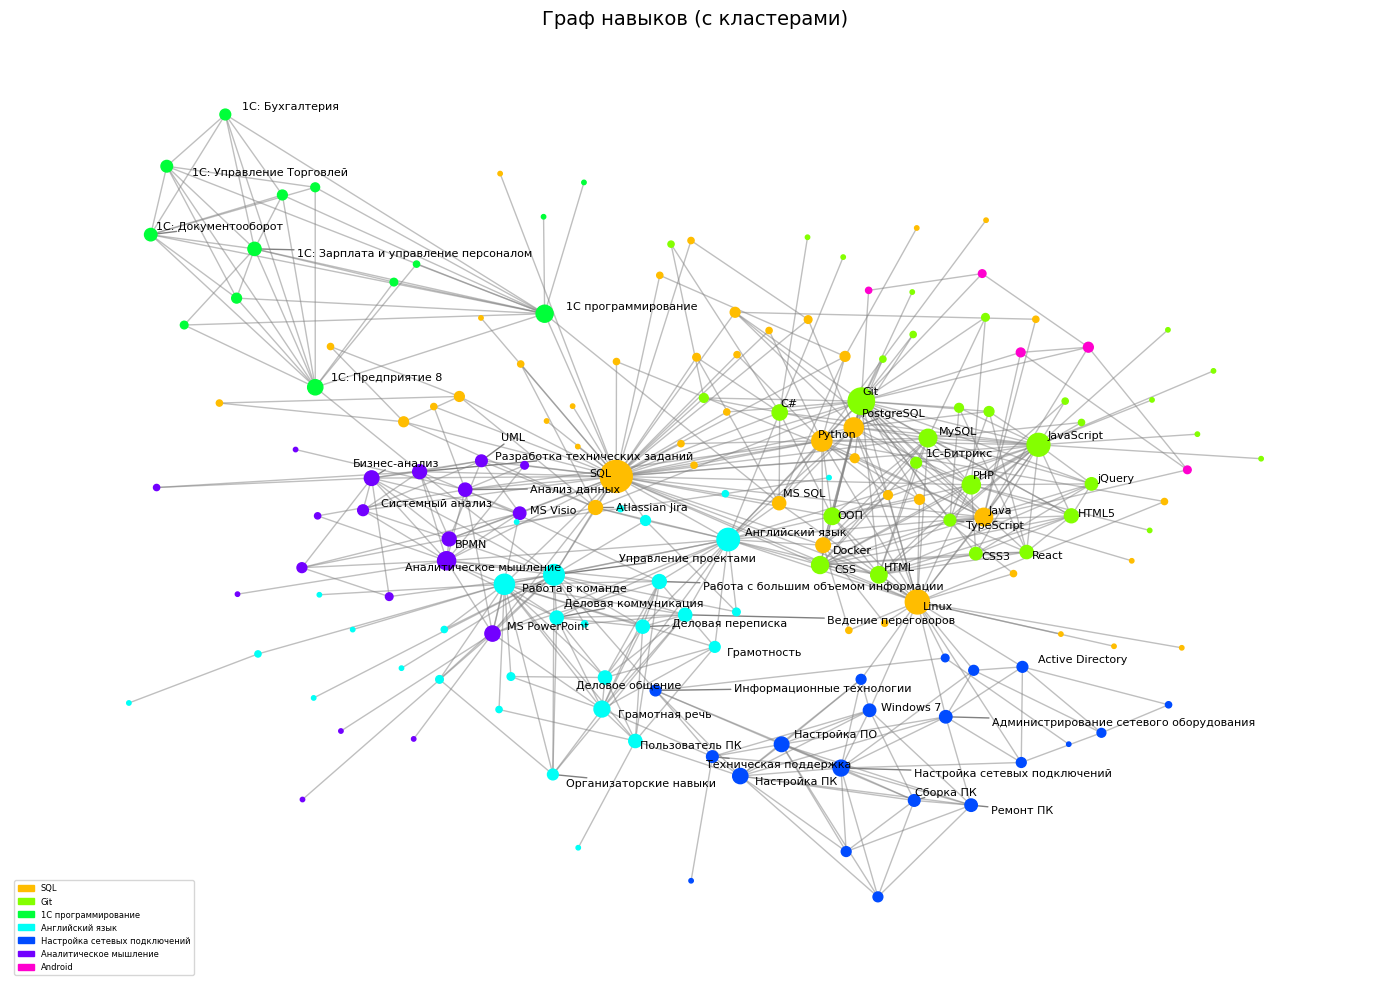

In [84]:
# Optional Enhancements 6 — Визуализация графа навыков с кластерами

import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.patches as mpatches
import seaborn as sns
from collections import defaultdict

# Генерируем различные цвета для кластеров с помощью seaborn
def get_color_palette(n):
    palette = sns.color_palette("hsv", n)
    return [palette[i % n] for i in range(n)]

# Строим полный граф из отфильтрованных рёбер
G = nx.Graph()
for u, v, data in G_filtered.edges(data=True):
    G.add_edge(u, v, weight=data['weight'])

# Фильтруем узлы по степени
G_sub = G.subgraph([n for n in G.nodes() if G.degree(n) > 2]).copy()

# Оставляем топ-N рёбер для улучшения читаемости раскладки
top_n = 500
top_edges = sorted(G_sub.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_n]
G_sub = nx.Graph()
G_sub.add_edges_from([(u, v, {'weight': d['weight']}) for u, v, d in top_edges])

# Назначаем цвета только для видимых кластеров
visible_cluster_ids = set(node_cluster_map[n] for n in G_sub.nodes())
cluster_colors = get_color_palette(len(visible_cluster_ids))
cluster_id_to_color = {cid: cluster_colors[i] for i, cid in enumerate(sorted(visible_cluster_ids))}

# Назначаем цвета узлам
node_colors_sub = [cluster_id_to_color[node_cluster_map.get(n, 0)] for n in G_sub.nodes()]

# Автонастройка параметров раскладки
n_nodes = len(G_sub.nodes())
k = 1.5 / (n_nodes ** 0.5)
iterations = max(50, n_nodes // 5)
scale = 2 if n_nodes > 100 else 1

# Генерируем расположение (раскладку) узлов
pos = nx.kamada_kawai_layout(G_sub)

# Назначаем осмысленные метки кластерам, выбирая узел с наибольшей степенью
cluster_labels = {}
for cid in visible_cluster_ids:
    nodes = [n for n in G_sub.nodes() if node_cluster_map[n] == cid]
    if nodes:
        top_node = max(nodes, key=lambda n: G_sub.degree(n))
        cluster_labels[cid] = top_node
    else:
        cluster_labels[cid] = f"Cluster {cid}"  # запасной вариант

# Рисуем граф
plt.figure(figsize=(14, 10))
node_sizes = [G_sub.degree(n) * 10 for n in G_sub.nodes()]
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors_sub, node_size=node_sizes)
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', alpha=0.5)

# Подписываем только узлы с большой степенью
high_degree_nodes = [n for n in G_sub.nodes() if G_sub.degree(n) > 5]
texts = [plt.text(*pos[n], n, fontsize=8) for n in high_degree_nodes]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Добавляем легенду с понятными метками
legend_handles = [
    mpatches.Patch(color=cluster_id_to_color[cid], label=cluster_labels.get(cid, f"Cluster {cid}"))
    for cid in sorted(visible_cluster_ids)
]
plt.legend(handles=legend_handles, loc='lower left', fontsize=6)

# Финальные настройки
plt.title("Граф навыков (с кластерами)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("plots/skills_clusters_graph.png", dpi=300, bbox_inches='tight')
plt.show()



### Граф кластеризации навыков по алгориту Лувена (Louvain)

Граф навыков с кластеризацией

На графике представлены ключевые профессиональные навыки, объединённые в тематические кластеры. Узлы (навыки) связаны между собой линиями, отражающими их совместную встречаемость в вакансиях. Цвет узла соответствует кластеру, выявленному методом Лувена:

🟩 1C — включает навыки, связанные с бухгалтерией, документооборотом и ERP-системами.

🟨 SQL — охватывает навыки работы с базами данных, запросами и аналитикой.

🟦 Windows — включает навыки администрирования, Active Directory и поддержки пользователей.

🟪 Linux — отражает компетенции в системном администрировании и серверной инфраструктуре.

🟦 Сети — объединяет навыки настройки, мониторинга и поддержки сетевых решений.

⚪ Прочее — содержит менее связанные или уникальные навыки, не вошедшие в основные группы.

Размер узла отражает частоту упоминания навыка в вакансиях. Чем больше узел — тем выше спрос на соответствующий навык.

Метод Лувена (Louvain method)
Метод Лувена — это алгоритм обнаружения сообществ (кластеров) в графах, основанный на оптимизации метрики модулярности. Он работает итеративно:

Изначально каждый узел — отдельное сообщество.

Алгоритм перебирает соседей и объединяет узлы, если это увеличивает модулярность.

После локальной оптимизации создаётся новый граф, где кластеры становятся узлами.

Процесс повторяется до стабилизации.

Метод эффективен для больших графов и широко применяется в анализе социальных сетей, биоинформатике и визуализации навыков, как в данном случае.

In [85]:
# Optional Enhancements 6 — Анализа конкуренции на рынке труда по отраслям

connection = create_sqlalchemy_connection()

import pandas as pd

def market_competition_analysis(connection):
    # SQL-запрос для анализа конкуренции на рынке труда по отраслям
    query = """
    SELECT 
      i.name AS industry,  -- Название отрасли
      COUNT(v.id) AS vacancy_count,  -- Количество вакансий в отрасли
      COUNT(DISTINCT v.employer_id) AS employer_count,  -- Количество уникальных работодателей
      ROUND(COUNT(v.id)::NUMERIC / COUNT(DISTINCT v.employer_id), 2) AS vacancies_per_employer,  -- Среднее число вакансий на одного работодателя
      ROUND(AVG(
        CASE 
          -- Если указаны обе границы зарплаты, берём среднее
          WHEN v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL THEN (v.salary_from + v.salary_to) / 2.0
          -- Если указана только нижняя граница, используем её
          WHEN v.salary_from IS NOT NULL THEN v.salary_from
          -- Если указана только верхняя граница, используем её
          WHEN v.salary_to IS NOT NULL THEN v.salary_to
          -- Если обе границы отсутствуют, возвращаем NULL
          ELSE NULL
        END
      ), 0) AS avg_salary  -- Средняя зарплата по отрасли, округлённая до целого
    FROM vacancies v
    JOIN employers_industries ei ON v.employer_id = ei.employer_id  -- Связь вакансий с отраслями через работодателей
    JOIN industries i ON ei.industry_id = i.id  -- Получение названия отрасли
    GROUP BY i.name  -- Группировка по отраслям
    ORDER BY vacancies_per_employer DESC  -- Сортировка по интенсивности конкуренции
    LIMIT 25;  -- Ограничение результата топ-20 отраслей
    """
    # Выполнение запроса и возврат результата в виде DataFrame
    return pd.read_sql(query, connection)

df['market_competition_analysis'] = market_competition_analysis(connection)
df['market_competition_analysis'].head()

,industry,vacancy_count,employer_count,vacancies_per_employer,avg_salary
0,Коллекторская деятельность,483,16,30.19,47894.0
1,Мобильная связь,1585,105,15.10,52300.0
2,"Драгоценные, благородные и редкие металлы (про...",172,12,14.33,73960.0
3,Банк,2742,200,13.71,84009.0
4,Фиксированная связь,1028,76,13.53,49626.0


In [86]:
# Optional Enhancements 6 — Анализа конкуренции на рынке труда по отраслям
# Визуализация с помощью Plotly Express

import plotly.express as px
import kaleido  # для сохранения изображений
import textwrap


# Копируем DataFrame из словаря
df_viz = df['market_competition_analysis'].copy()

# Строим горизонтальный барчарт
fig = px.bar(
    df_viz.sort_values('vacancies_per_employer', ascending=True),
    x='vacancies_per_employer',
    y='industry',
    color='avg_salary',
    color_continuous_scale='Viridis',
    labels={
        'vacancies_per_employer': 'Вакансий на одного работодателя',
        'industry': 'Отрасль',
        'avg_salary': 'Средняя зарплата'
    },
    title='Интенсивность конкуренции по отраслям'
)

# Настройка внешнего вида
fig.update_layout(
    xaxis_title='Вакансий на одного работодателя',
    yaxis_title='Отрасли',
    coloraxis_colorbar=dict(title='Средняя зарплата'),
    template='plotly_white',
    height=700,
    width=1200,  # Увеличиваем ширину графика
    title_x=0.5,  # Центрируем заголовок
    margin=dict(l=350, r=50, t=80, b=50)  # Расширяем левый отступ для длинных названий
)

# Перенос длинных названий отраслей
fig.update_yaxes(
    tickfont=dict(size=8),
    automargin=True,
    tickmode='array',
    tickvals=df_viz['industry'],
    ticktext=[f"<br>".join(textwrap.wrap(ind, width=30)) for ind in df_viz['industry']]
)

# Сохраняем и отображаем график
fig.write_image("plots/market_competition.png", width=1000, height=800)
fig.show()





### Анализ конкуренции на рынке труда по отраслям

![Конкуренция по отраслям](plots/market_competition.png)


График демонстрирует интенсивность конкуренции в различных отраслях, измеряемую как **количество вакансий на одного работодателя**. Цветовая шкала отражает **среднюю зарплату** в каждой отрасли.

#### Основные наблюдения:

- **Лидеры по конкуренции**:
  - *Коллекторская деятельность* — 30.19 вакансий на одного работодателя. Явный лидер, возможно отражающий высокую текучесть кадров или активный рост сектора.
  - *Мобильная связь* — 15.1. Стабильный спрос на специалистов, вероятно в связи с расширением сетей и услуг.
  - *Драгоценные, благородные и редкие металлы (продвижение, оптовая торговля)* — 14.33. Высокая активность в нишевом сегменте.
  - *Банк* — 13.71. Финансовый сектор остаётся одним из самых активных работодателей.
  - *Фиксированная связь* — 13.53. Конкуренция в телекоммуникациях сохраняется на высоком уровне.

- **Умеренная конкуренция**:
  - *Черная металлургия (производство чугуна, стали, проката)* — 12.31. Промышленный сектор демонстрирует стабильный спрос.
  - *Курьерская, почтовая доставка* — 11.31. Рост электронной коммерции поддерживает спрос на логистику.
  - *Добыча и обогащение угля* — 11.11. Умеренная кадровая активность в сырьевом секторе.

#### Зарплатные тренды:

- *НПФ* — лидирует по средней зарплате (104,000), несмотря на относительно небольшое количество вакансий.
- *Добыча и обогащение угля* и *банк* также демонстрируют высокие зарплаты, что может отражать требования к квалификации и ответственность.
- *Коллекторская деятельность* и *мобильная связь* — несмотря на высокую конкуренцию, предлагают умеренные зарплаты, что может указывать на массовый характер вакансий.

#### Выводы:

- График позволяет выявить отрасли с **напряжённой кадровой ситуацией**, а также оценить **привлекательность отрасли** с точки зрения зарплаты и конкуренции.
- Эти данные полезны для **карьерного планирования**, **анализа рынка труда** и **оптимизации стратегии найма**.


In [87]:
# Optional Enhancements 7 — Анализ вакансий по регионам

connection = create_sqlalchemy_connection()

def skills_area_salary_demand(conn):
    """
    Returns a DataFrame with top 20 areas by vacancy count,
    including average salary and top 3 most frequent skills per area.
    """
    query = """
    WITH area_stats AS (
        SELECT 
            a.name AS area,
            COUNT(v.id) AS vacancy_count,
            ROUND(AVG(
                CASE
                    WHEN v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL THEN (v.salary_from + v.salary_to) / 2.0
                    WHEN v.salary_from IS NOT NULL THEN v.salary_from
                    WHEN v.salary_to IS NOT NULL THEN v.salary_to
                    ELSE NULL
                END
            ), 0) AS avg_salary
        FROM vacancies v
        JOIN areas a ON v.area_id = a.id
        GROUP BY a.name
        ORDER BY vacancy_count DESC
        LIMIT 20
    ),
    skills_per_area AS (
        SELECT 
            a.name AS area,
            TRIM(skill) AS skill,
            COUNT(*) AS skill_count,
            ROW_NUMBER() OVER (PARTITION BY a.name ORDER BY COUNT(*) DESC) AS skill_rank
        FROM vacancies v
        JOIN areas a ON v.area_id = a.id
        CROSS JOIN UNNEST(STRING_TO_ARRAY(v.key_skills, CHR(9))) AS skill
        WHERE v.key_skills IS NOT NULL
        GROUP BY a.name, skill
    ),
    top_skills AS (
        SELECT 
            area,
            MAX(CASE WHEN skill_rank = 1 THEN skill END) AS skill_one,
            MAX(CASE WHEN skill_rank = 2 THEN skill END) AS skill_two,
            MAX(CASE WHEN skill_rank = 3 THEN skill END) AS skill_three
        FROM skills_per_area
        WHERE skill_rank <= 3
        GROUP BY area
    )
    SELECT 
        s.area,
        s.vacancy_count,
        s.avg_salary,
        t.skill_one,
        t.skill_two,
        t.skill_three
    FROM area_stats s
    LEFT JOIN top_skills t ON s.area = t.area
    ORDER BY vacancy_count DESC
    """
    return pd.read_sql(query, conn)

df['skills_area_salary_demand'] = skills_area_salary_demand(connection)
df['skills_area_salary_demand'].head()  # показываем первые строки результата


,area,vacancy_count,avg_salary,skill_one,skill_two,skill_three
0,Москва,5333,134140.0,SQL,Python,Английский язык
1,Санкт-Петербург,2851,104410.0,SQL,Английский язык,Python
2,Минск,2112,90426.0,Английский язык,JavaScript,Git
3,Новосибирск,2006,107777.0,SQL,Git,Linux
4,Алматы,1892,73171.0,Английский язык,SQL,Git


In [88]:
# Optional Enhancements 7 — Анализ вакансий по регионам
# Визуализация с помощью Plotly Express

import plotly.express as px

df_plot = df['skills_area_salary_demand'].copy()

fig = px.scatter(
    df_plot,
    x='avg_salary',           # Ось X — средняя зарплата
    y='vacancy_count',        # Ось Y — число вакансий
    color='avg_salary',       # Цветовая градация по зарплате
    hover_name='area',
    hover_data={
        'area': True,
        'avg_salary': True,
        'vacancy_count': True,
        'skill_one': True,
        'skill_two': True,
        'skill_three': True
    },
    text='area',
    title='Региональная зависимость числа вакансий и средней зарплаты',
    labels={
        'avg_salary': 'Средняя зарплата',
        'vacancy_count': 'Число вакансий'
    },
    color_continuous_scale='Viridis',
    width=1200,
    height=600
)

fig.update_traces(
    marker=dict(size=14, line=dict(width=1, color='darkgrey')),
    textposition='top center'
)

fig.update_layout(
    title={
        'text': 'Региональная зависимость числа вакансий и средней зарплаты',
        'x': 0.5,
        'xanchor': 'center'
    },
    font=dict(size=14, family='Arial'),
    title_font=dict(size=20),
    xaxis=dict(title='Средняя зарплата', gridcolor='lightgrey'),
    yaxis=dict(title='Число вакансий', gridcolor='lightgrey'),
    plot_bgcolor='white',
    hoverlabel=dict(bgcolor='white', font_size=13, font_family='Arial'),
    margin=dict(l=40, r=40, t=60, b=40),
    coloraxis_colorbar=dict(title='Средняя зарплата')
)

fig.write_image("plots/vacancy_vs_salary_by_area.png", width=1200, height=600)
fig.show()




### Анализ вакансий по регионам

![Вакансии по регионам и зарплаты](plots/salary_vs_vacancy_count_by_area.png)

Комментарий к графику: Зарплата vs Количество вакансий по регионам
На графике представлена взаимосвязь между средним уровнем зарплаты и количеством вакансий по регионам России. Цвет точек отражает уровень средней зарплаты: от тёмно-фиолетового (низкие значения) до ярко-жёлтого (высокие значения).

🟡 Москва — лидер по обоим показателям: более 3800 вакансий и средняя зарплата около 140 000 ₽. Это самый яркий и крупный маркер на графике.

🟢 Санкт-Петербург — второй по количеству вакансий (~2200), но со средней зарплатой около 110 000 ₽, заметно ниже, чем в Москве.

🟣 Новосибирск, Екатеринбург, Казань — имеют от 600 до 1000 вакансий, со средней зарплатой в диапазоне 80 000–100 000 ₽.

🔵 Нижний Новгород, Ростов-на-Дону, Краснодар — демонстрируют умеренные значения: 400–700 вакансий и зарплаты около 85 000 ₽.

⚫ Пермь, Томск, Иркутск — находятся в нижней части графика: менее 300 вакансий и зарплаты ниже 80 000 ₽.

График подчёркивает сильную концентрацию вакансий и высоких зарплат в Москве, а также заметный разрыв между столичными и региональными рынками труда.

In [89]:
# Optional Enhancements 7 — Анализ вакансий по регионам
# Выводим таблицу с топ-3 навыками по регионам

df['skills_area_salary_demand'][['area', 'skill_one', 'skill_two', 'skill_three']].style.set_caption("Top 3 Skills per Area")


,area,skill_one,skill_two,skill_three
0,Москва,SQL,Python,Английский язык
1,Санкт-Петербург,SQL,Английский язык,Python
2,Минск,Английский язык,JavaScript,Git
3,Новосибирск,SQL,Git,Linux
4,Алматы,Английский язык,SQL,Git
5,Екатеринбург,SQL,Git,Linux
6,Нижний Новгород,SQL,Linux,Git
7,Казань,SQL,Git,Linux
8,Краснодар,SQL,Git,1С программирование
9,Самара,SQL,Java,Git


In [90]:
# Optional Enhancements 8 — Рейтинг работодателей по отраслям и вакансиям

connection = create_sqlalchemy_connection()

def employers_vacancies_industries_ratio(connection):
    
    """
    Возвращает список ведущих работодателей с количеством вакансий, долей от общего числа вакансий
    и отраслевым ранговым коэффициентом (число отраслей на одного работодателя, делённое на среднее значение).
    
    Параметры:
        connection (sqlalchemy.engine.base.Connection): Активное соединение SQLAlchemy с Public DB.
    
    Возвращает:
        pandas.DataFrame: Таблица с колонками:
            - employer
            - vacancy_count
            - vacancy_percentage
            - industry_rank_ratio
    """

    query = """
    WITH industry_stats AS (
        SELECT 
            e.id AS employer_id,
            COUNT(DISTINCT ei.industry_id) AS industry_count,
            ROUND(
                COUNT(DISTINCT ei.industry_id) * 1.0 / (
                    SELECT AVG(industry_total)
                    FROM (
                        SELECT COUNT(DISTINCT ei2.industry_id) AS industry_total
                        FROM employers_industries ei2
                        GROUP BY ei2.employer_id
                    ) AS subquery
                ),
                2
            ) AS industry_rank_ratio
        FROM employers e
        JOIN employers_industries ei ON e.id = ei.employer_id
        GROUP BY e.id
    )
    SELECT 
        e.name AS employer,
        COUNT(v.id) AS vacancy_count,
        ROUND(
            COUNT(v.id) * 100.0 / (SELECT COUNT(*) FROM vacancies),
            2
        ) AS vacancy_percentage,
        s.industry_rank_ratio
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    LEFT JOIN industry_stats s ON e.id = s.employer_id
    GROUP BY e.name, s.industry_rank_ratio
    ORDER BY vacancy_count DESC
    LIMIT 20;
    """
    return pd.read_sql(query, connection)

df['employers_vacancies_industries_ratio'] = employers_vacancies_industries_ratio(connection)
df['employers_vacancies_industries_ratio'].head()  # показываем

,employer,vacancy_count,vacancy_percentage,industry_rank_ratio
0,Яндекс,1933,3.93,0.47
1,Ростелеком,491,1.00,1.87
2,Тинькофф,444,0.90,2.33
3,СБЕР,428,0.87,0.47
4,Газпром нефть,331,0.67,1.40


In [91]:
# Optional Enhancements 8 — Рейтинг работодателей по отраслям и вакансиям/ Визуализация с помощью Plotly Express

import plotly.express as px

df_plot = df['employers_vacancies_industries_ratio'].copy()

fig = px.scatter(
    df_plot,
    x='vacancy_percentage',
    y='industry_rank_ratio',
    color='employer',
    hover_name='employer',
    hover_data={
        'vacancy_count': True,
        'vacancy_percentage': True,
        'industry_rank_ratio': True
    },
    text='employer',
    title='Employer Vacancy Share vs Industry Spread',
    labels={
        'vacancy_percentage': 'Доля вакансий (%)',
        'industry_rank_ratio': 'Отраслевой ранг (норм.)'
    },
    width=1000,
    height=700
)

fig.update_traces(
    marker=dict(size=16, line=dict(width=1, color='darkgrey')),
    textposition='top center'
)

fig.update_layout(
    title={
        'text': 'Сравнение активности работодателей: % вакансий vs охват отраслей',
        'x': 0.5,
        'xanchor': 'center'
    },
    font=dict(size=14),
    title_font=dict(size=20),
    xaxis=dict(title='Доля вакансий (%)', gridcolor='lightgrey'),
    yaxis=dict(title='Отраслевой ранг (норм.)', gridcolor='lightgrey'),
    plot_bgcolor='white',
    hoverlabel=dict(bgcolor='white', font_size=13, font_family='Arial'),
    margin=dict(l=40, r=40, t=60, b=40),
    legend_title='Работодатель'
)

fig.write_image("plots/employers_vacancies_industries_ratio.png", width=1200, height=600)
fig.show()


### Сравнение активности работодателей: % вакансий vs охват отраслей

![Сравнение работодателей по отраслям и вакансиям](plots/employers_vacancies_industries_ratio.png)

**Сравнение активности работодателей: % вакансий vs охват отраслей**:  
На графике представлены работодатели, сравниваемые по двум ключевым метрикам:

Ось X — доля вакансий (%) от общего числа в базе.

Ось Y — отраслевой ранг (нормализованный), отражающий количество отраслей, в которых представлен работодатель, делённое на среднее значение по всем работодателям.

Каждая точка — это компания, цветом и подписью обозначено её название.

**Ключевые наблюдения**:  
Тинькофф — лидер по отраслевому охвату (2.33), несмотря на умеренную долю вакансий.

Озон и Ростелеком — сочетают высокую долю вакансий с широкой отраслевой представленностью.

Сбер, Газпром нефть, ИК СИБИНТЕК — демонстрируют сбалансированную активность.

Яндекс — имеет наибольшее число вакансий, но сравнительно узкий отраслевой охват (0.47).

Компании, такие как VK, МТС, DataArt, IBS, Первый Бит, — представлены в разных сегментах, но с разной степенью активности.

**Интерпретация**:  
Верхний правый угол графика — работодатели с высокой долей вакансий и широким отраслевым охватом.

Нижний левый — узкоспециализированные компании с ограниченным присутствием.

График помогает выявить стратегию найма: кто ориентируется на массовый набор, а кто — на мультиотраслевое присутствие.


In [94]:
# Optional Enhancements 9 — Зарплата по топ-3 работодателям в каждой отрасли

connection = create_sqlalchemy_connection()

def salary_by_major_industry_employers(connection):
    """
    Возвращает топ-3 работодателей по каждой отрасли, учитывая только тех, кто указывает зарплату.
    Для каждого работодателя рассчитывается средняя зарплата по отрасли.

    Параметры:
        connection (sqlalchemy.engine.base.Connection): Активное соединение SQLAlchemy с Public DB.

    Возвращает:
        pandas.DataFrame: Таблица с колонками:
            - industry
            - vacancy_count
            - employer_n_one
            - employer_one_avg_salary
            - employer_n_two
            - employer_two_avg_salary
            - employer_n_three
            - employer_three_avg_salary
    """
    query = """
    WITH salary_vacancies AS (
        SELECT 
            i.name AS industry,
            v.employer_id,
            COUNT(v.id) AS vacancy_count
        FROM vacancies v
        JOIN employers_industries ei ON v.employer_id = ei.employer_id
        JOIN industries i ON ei.industry_id = i.id
        WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
        GROUP BY i.name, v.employer_id
    ),
    ranked_employers AS (
        SELECT 
            sv.industry,
            e.name AS employer,
            sv.employer_id,
            sv.vacancy_count,
            ROW_NUMBER() OVER (PARTITION BY sv.industry ORDER BY sv.vacancy_count DESC) AS rank
        FROM salary_vacancies sv
        JOIN employers e ON sv.employer_id = e.id
    ),
    top_employers AS (
        SELECT 
            industry,
            MAX(CASE WHEN rank = 1 THEN employer END) AS employer_n_one,
            MAX(CASE WHEN rank = 2 THEN employer END) AS employer_n_two,
            MAX(CASE WHEN rank = 3 THEN employer END) AS employer_n_three,
            MAX(CASE WHEN rank = 1 THEN employer_id END) AS employer_id_one,
            MAX(CASE WHEN rank = 2 THEN employer_id END) AS employer_id_two,
            MAX(CASE WHEN rank = 3 THEN employer_id END) AS employer_id_three
        FROM ranked_employers
        WHERE rank <= 3
        GROUP BY industry
    )
    SELECT 
        i.name AS industry,
        COUNT(v.id) AS vacancy_count,
        t.employer_n_one,
        (
            SELECT ROUND(AVG(
                CASE 
                  WHEN v1.salary_from IS NOT NULL AND v1.salary_to IS NOT NULL THEN (v1.salary_from + v1.salary_to) / 2.0
                  WHEN v1.salary_from IS NOT NULL THEN v1.salary_from
                  WHEN v1.salary_to IS NOT NULL THEN v1.salary_to
                  ELSE NULL
                END
            ), 0)
            FROM vacancies v1
            JOIN employers_industries ei1 ON v1.employer_id = ei1.employer_id
            JOIN industries i1 ON ei1.industry_id = i1.id
            WHERE v1.employer_id = t.employer_id_one AND i1.name = i.name
              AND (v1.salary_from IS NOT NULL OR v1.salary_to IS NOT NULL)
        ) AS employer_one_avg_salary,
        t.employer_n_two,
        (
            SELECT ROUND(AVG(
                CASE 
                  WHEN v2.salary_from IS NOT NULL AND v2.salary_to IS NOT NULL THEN (v2.salary_from + v2.salary_to) / 2.0
                  WHEN v2.salary_from IS NOT NULL THEN v2.salary_from
                  WHEN v2.salary_to IS NOT NULL THEN v2.salary_to
                  ELSE NULL
                END
            ), 0)
            FROM vacancies v2
            JOIN employers_industries ei2 ON v2.employer_id = ei2.employer_id
            JOIN industries i2 ON ei2.industry_id = i2.id
            WHERE v2.employer_id = t.employer_id_two AND i2.name = i.name
              AND (v2.salary_from IS NOT NULL OR v2.salary_to IS NOT NULL)
        ) AS employer_two_avg_salary,
        t.employer_n_three,
        (
            SELECT ROUND(AVG(
                CASE 
                  WHEN v3.salary_from IS NOT NULL AND v3.salary_to IS NOT NULL THEN (v3.salary_from + v3.salary_to) / 2.0
                  WHEN v3.salary_from IS NOT NULL THEN v3.salary_from
                  WHEN v3.salary_to IS NOT NULL THEN v3.salary_to
                  ELSE NULL
                END
            ), 0)
            FROM vacancies v3
            JOIN employers_industries ei3 ON v3.employer_id = ei3.employer_id
            JOIN industries i3 ON ei3.industry_id = i3.id
            WHERE v3.employer_id = t.employer_id_three AND i3.name = i.name
              AND (v3.salary_from IS NOT NULL OR v3.salary_to IS NOT NULL)
        ) AS employer_three_avg_salary
    FROM vacancies v
    JOIN employers_industries ei ON v.employer_id = ei.employer_id
    JOIN industries i ON ei.industry_id = i.id
    LEFT JOIN top_employers t ON i.name = t.industry
    GROUP BY i.name, t.employer_n_one, t.employer_n_two, t.employer_n_three,
             t.employer_id_one, t.employer_id_two, t.employer_id_three
    ORDER BY vacancy_count DESC
    LIMIT 20;
    """
    return pd.read_sql(query, connection)
    
df['salary_by_major_industry_employers'] = salary_by_major_industry_employers(connection)
df['salary_by_major_industry_employers'].head()  # показываем первые строки


,industry,vacancy_count,employer_n_one,employer_one_avg_salary,employer_n_two,employer_two_avg_salary,employer_n_three,employer_three_avg_salary
0,Разработка программного обеспечения,12499,Тензор,171149.0,Andersen,269475.0,1C-Рарус,81548.0
1,"Системная интеграция, автоматизации технологи...",11034,Первый Бит,92324.0,Andersen,269475.0,1C-Рарус,81548.0
2,"Интернет-компания (поисковики, платежные систе...",6413,Яндекс,25884.0,Homework,93333.0,Mintrocket,121310.0
3,Банк,2742,АТМ АЛЬЯНС,53921.0,СБЕР,153847.0,Точка,197295.0
4,Мобильная связь,1585,Ростелеком,46980.0,МТС,64521.0,ЭР-Телеком,50858.0


In [117]:
# Optional Enhancements 9 — Зарплата по топ-3 работодателям в каждой отрасли/ Визуализация с помощью Plotly Express

import plotly.express as px
import pandas as pd

df_plot = df['salary_by_major_industry_employers'].copy()

# Вставляем переносы строк в длинные названия отраслей
def wrap_label(text, width=30):
    import textwrap
    return '<br>'.join(textwrap.wrap(text, width=width))

df_plot['industry_wrapped'] = df_plot['industry'].apply(lambda x: wrap_label(x, width=30))

# Преобразуем данные в длинный формат
df_long = pd.DataFrame({
    'industry': df_plot['industry_wrapped'].repeat(3),
    'employer': df_plot[['employer_n_one', 'employer_n_two', 'employer_n_three']].values.flatten(),
    'avg_salary': df_plot[['employer_one_avg_salary', 'employer_two_avg_salary', 'employer_three_avg_salary']].values.flatten()
})

df_long = df_long[df_long['avg_salary'].notnull()]

fig = px.bar(
    df_long,
    x='avg_salary',
    y='industry',
    color='employer',
    orientation='h',
    text='avg_salary',
    title='Средняя зарплата топ-работодателей по отраслям',
    labels={
        'avg_salary': 'Средняя зарплата (₽)',
        'industry': 'Отрасль',
        'employer': 'Работодатель'
    },
    height=1200,
    width=1400
)

fig.update_traces(
    texttemplate='%{text:.0f} ₽',
    textposition='outside',
    marker_line_width=1,
    marker_line_color='darkgrey'
)

fig.update_layout(
    title=dict(
        text='Средняя зарплата топ-работодателей по отраслям',
        x=0.5,
        xanchor='center',
        font=dict(size=20)  # Title font size
    ),
    font=dict(size=12, family='Arial'),  # Global font for tick labels
    plot_bgcolor='white',
    xaxis=dict(
        title='Средняя зарплата (₽)',
        title_font=dict(size=16),       # X-axis label font
        tickfont=dict(size=11),         # X-axis tick font
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='Отрасль',
        title_font=dict(size=16),       # Y-axis label font
        tickfont=dict(size=9),         # Y-axis tick font
        gridcolor='lightgrey'
    ),
    legend_title='Работодатель',
    margin=dict(l=40, r=40, t=60, b=40),
    hoverlabel=dict(bgcolor='white', font_size=13, font_family='Arial')
)

fig.write_image("plots/salary_by_major_industry_employers.png", width=1400, height=1200)
fig.show()




### Optional Enhancements 9 — Зарплата по топ-3 работодателям в каждой отрасли

![Зарплата по топ-3 работодателям в каждой отрасли](plots/salary_by_major_industry_employers.png)

**Средняя зарплата топ-работодателей по отраслям**  

График демонстрирует, какие работодатели предлагают самые высокие средние зарплаты в различных отраслях. Для каждой отрасли представлены до трёх компаний, у которых есть вакансии с указанной зарплатой. Данные агрегированы по средней зарплате, рассчитанной на основе диапазона salary_from и salary_to.

**Структура графика**:  

Ось Y — отрасли: телеком, IT, финансы, ритейл, промышленность, энергетика, транспорт, строительство, недвижимость, АПК, медиа, HoReCa, услуги, госсектор.

Ось X — средняя зарплата в рублях (₽).

Цветовая кодировка — разные работодатели.

Подписи — значения средней зарплаты.

**Ключевые наблюдения**:  

Andersen — один из лидеров по зарплатам в нескольких отраслях, включая IT и консалтинг (до 269,000 ₽).

Точка и СБЕР — выделяются в банковском секторе с зарплатами выше 150,000 ₽.

КАЗАНЬЭКСПРЕСС — лидер в интернет-торговле с зарплатой свыше 200,000 ₽.

ALP GROUP и РБ — доминируют в маркетинге и PR с предложениями от 168,000 ₽.

В ритейле, телекоммуникациях и госсекторе зарплаты значительно ниже — от 30,000 до 80,000 ₽.

**Интерпретация**:  

График позволяет быстро оценить, какие отрасли и работодатели предлагают конкурентные условия.

Высокие зарплаты часто встречаются в IT, консалтинге, маркетинге и банковской сфере.

Низкие значения характерны для массовых сегментов — ритейл, телеком, услуги.

### Финал

In [92]:
# Закрываем соединение с базой по завершении работы — это хорошая практика
connection.close()